In [1]:
import os

import pandas as pd

In [2]:
RESULTS_DIR = os.path.join("..", "results")
DATA_DIR = os.path.join(RESULTS_DIR, "data")
FIGURES_DIR = os.path.join(RESULTS_DIR, "figures")
RESULTS_DIR, DATA_DIR, FIGURES_DIR

('../results', '../results/data', '../results/figures')

In [3]:
csv_files = [
    f for f in os.listdir(DATA_DIR) if f.startswith("HW_run_") and f.endswith(".csv")
]
# Sort the files based on the number in the filename
csv_files.sort(key=lambda x: int(x.split("_")[2].split(".")[0]))

# Create a list to store all the dataframes
df_list = []

for i, csv_file in enumerate(csv_files):
    full_path = os.path.join(DATA_DIR, csv_file)
    df = pd.read_csv(full_path)
    # Add a new column 'run_id' to the dataframe
    df["run_id"] = i
    df_list.append(df)

# Use pd.concat to concatenate all the dataframes in the list
all_data = pd.concat(df_list, ignore_index=True)

all_data.to_csv("HW_all.csv", index=False)

In [4]:
all_data

,time,direction,event,FrontL,FrontR,FrontC,BackL,BackR,BackC,FrontLL,FrontRR,run_id
0,0.000000,forward,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,forward,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.233000,forward,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.410000,forward,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.579000,forward,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
503,8.473751,forward,NaN,12.0,17.0,3.0,4.0,3.0,8.0,14.0,5.0,12
504,8.698009,forward,NaN,12.0,17.0,3.0,4.0,3.0,8.0,14.0,5.0,12
505,8.938134,forward,NaN,12.0,17.0,3.0,4.0,3.0,8.0,14.0,5.0,12
506,9.201475,forward,NaN,12.0,17.0,3.0,4.0,3.0,8.0,14.0,5.0,12


In [13]:
import matplotlib.pyplot as plt


def plot_sensor_readings(data, direction, run_id):
    # Filter the data for the given direction and run_id
    filtered_data = data[(data["direction"] == direction) & (data["run_id"] == run_id)]

    # List of sensor columns
    sensors = [
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ]

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        plt.plot(filtered_data["time"], filtered_data[sensor], label=sensor)

    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.title(
        f"Sensor Readings for {direction.capitalize()} Direction (run_id={run_id})"
    )
    plt.legend()
    plt.show()

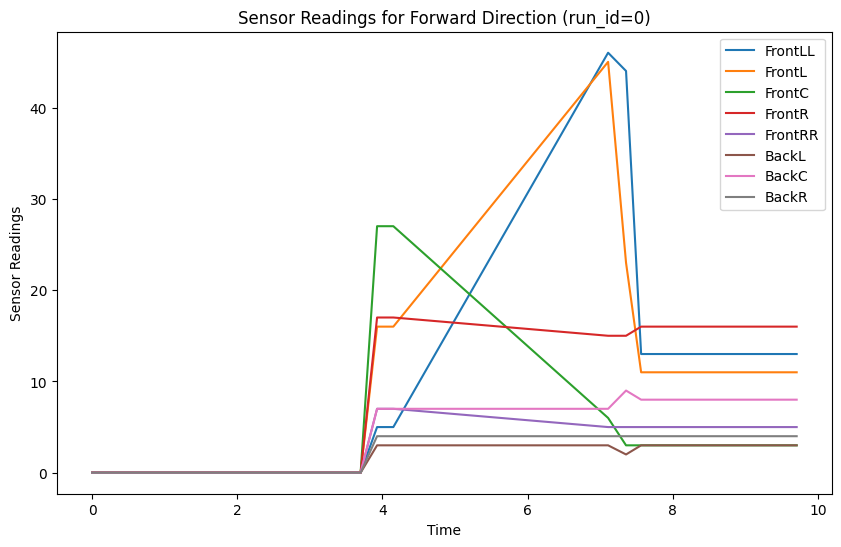

In [14]:
plot_sensor_readings(all_data, "forward", 0)

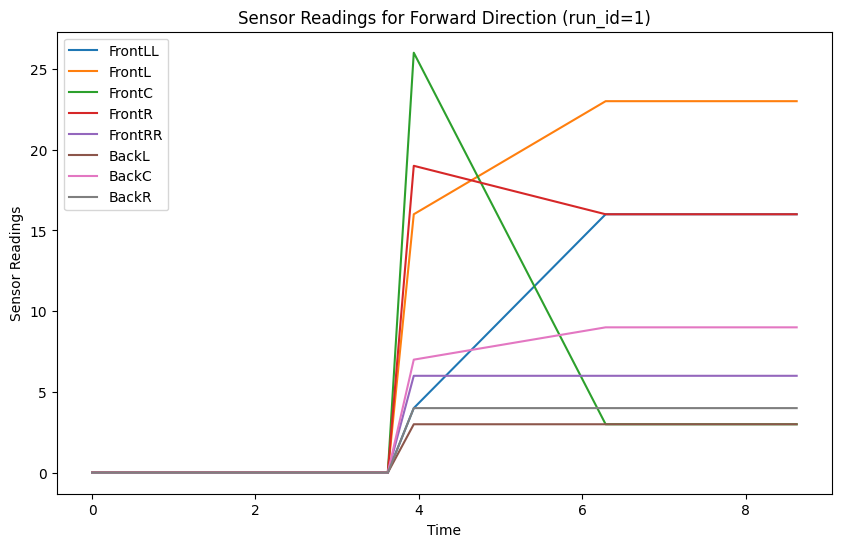

In [15]:
plot_sensor_readings(all_data, "forward", 1)

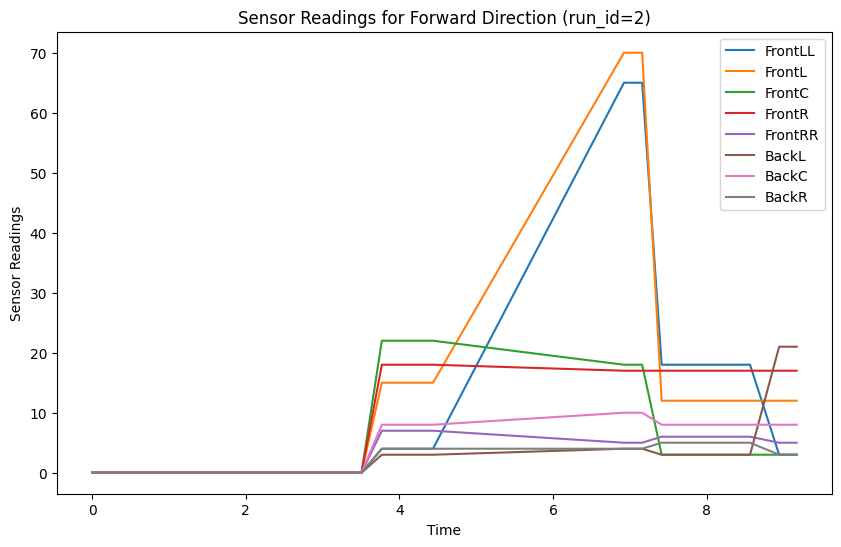

In [16]:
plot_sensor_readings(all_data, "forward", 2)

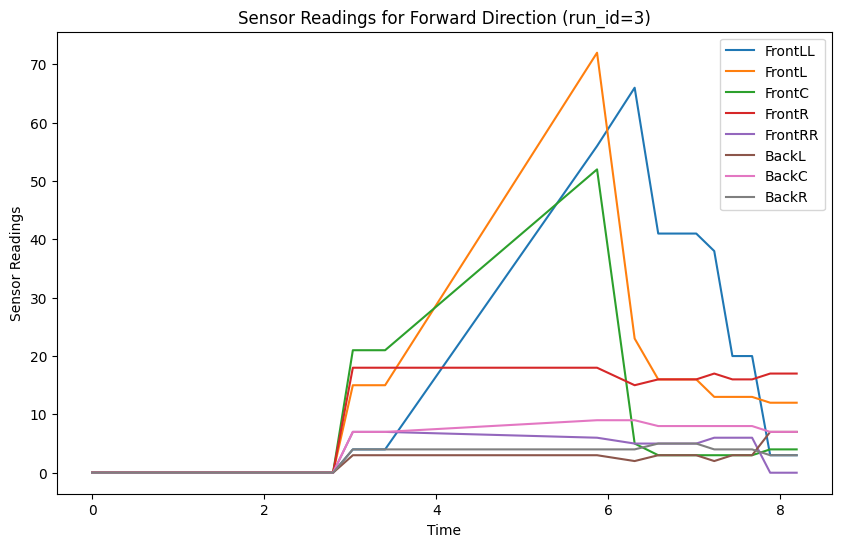

In [17]:
plot_sensor_readings(all_data, "forward", 3)